# Settings

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
!pip install dask  
!python -m pip install dask[dataframe] --upgrade

You should consider upgrading via the 'c:\users\pchaudhari\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\pchaudhari\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import torch
import tensorflow
import os
import json
import time
import glob
import re
import sys
import collections
from nltk import flatten
import dask
from dask import delayed,compute
import dask.dataframe as dd
from dask.multiprocessing import get
from tqdm._tqdm_notebook import tqdm_notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm_notebook.pandas()

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

import warnings
warnings.filterwarnings('ignore')

C:\Users\pchaudhari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  app.launch_new_instance()


In [4]:
#Read tran text data
train_text = pd.read_csv('train_text.csv',index_col=0)
train_text.tail(4)

,Text,FileName,Folder
320941,"vSphere, Training & Technical Documentation\nS...",https---www.vmware.com-support-vsphere.txt,2021-input-vmw-com
320942,Open Source Files for vSphere RC1\nSupport\nvS...,https---www.vmware.com-support-vsphere_rc1_os.txt,2021-input-vmw-com
320943,Customer Support Welcome Center\nSupport\nWelc...,https---www.vmware.com-support-welcome-center.txt,2021-input-vmw-com
320944,"VMware Workstation Support, Training & amp; Te...",https---www.vmware.com-support-workstation.txt,2021-input-vmw-com


In [5]:
train_text_cleaned = train_text.loc[train_text[~train_text['Text'].isnull()].index.tolist()]
train_text_cleaned.isnull().sum()

Text        0
FileName    0
Folder      0
dtype: int64

In [6]:
train_text_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320685 entries, 0 to 320944
Data columns (total 3 columns):
Text        320685 non-null object
FileName    320685 non-null object
Folder      320685 non-null object
dtypes: object(3)
memory usage: 9.8+ MB


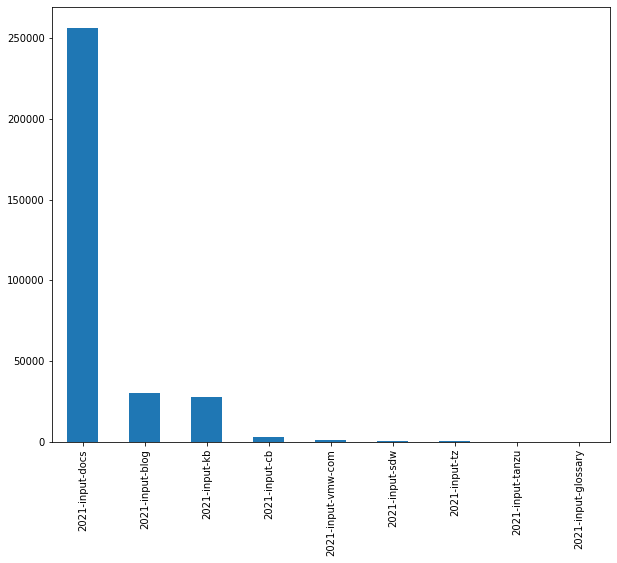

In [7]:
plt.figure(figsize=(10,8))
train_text_cleaned['Folder'].value_counts().plot.bar()
plt.show()

In [8]:
#Install scispcy and spacy and pretrained model enc_core_sci_lg for analysis
!pip install -U spacy
!pip install scispacy

  Attempting uninstall: spacy-legacy
    Found existing installation: spacy-legacy 3.0.6
    Uninstalling spacy-legacy-3.0.6:
      Successfully uninstalled spacy-legacy-3.0.6
  Attempting uninstall: spacy
    Found existing installation: spacy 3.0.6
    Uninstalling spacy-3.0.6:
      Successfully uninstalled spacy-3.0.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scispacy 0.4.0 requires spacy<3.1.0,>=3.0.0, but you have spacy 3.1.0 which is incompatible.
en-core-web-sm 3.0.0 requires spacy<3.1.0,>=3.0.0, but you have spacy 3.1.0 which is incompatible.
en-core-web-lg 3.0.0 requires spacy<3.1.0,>=3.0.0, but you have spacy 3.1.0 which is incompatible.
You should consider upgrading via the 'c:\users\pchaudhari\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


  Using cached spacy-3.0.6-cp37-cp37m-win_amd64.whl (11.7 MB)
  Attempting uninstall: spacy
    Found existing installation: spacy 3.1.0
    Uninstalling spacy-3.1.0:
      Successfully uninstalled spacy-3.1.0


You should consider upgrading via the 'c:\users\pchaudhari\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [9]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'C:\Users\pchaudhari\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [10]:
import scispacy
import spacy
import en_core_web_sm

In [11]:
## loading en_core_sci_lg model and disabling parser and ner, as these are not going to be used in EDA, disabling these functions from NLP pipeline can sometimes make a big difference and improve loading speed
nlp = en_core_web_sm.load(disable=["parser", "ner"])
nlp.max_length = 2000000

In [12]:
#train_text__ = train_text_cleaned[~train_text_cleaned["Text"].duplicated()]
train_text__ = train_text_cleaned
train_text__.tail(10)

,Text,FileName,Folder
320935,Vrealize Orchestrator\nSupport\nVrealize Orche...,https---www.vmware.com-support-vrealize-orches...,2021-input-vmw-com
320936,"vRealize Suite Support, Training & Technical D...",https---www.vmware.com-support-vrealize-suite.txt,2021-input-vmw-com
320937,"vSphere Data Protection Advanced Support, Trai...",https---www.vmware.com-support-vsphere-data-pr...,2021-input-vmw-com
320938,VMware vSphere Hypervisor ESXi Support Center\...,https---www.vmware.com-support-vsphere-hypervi...,2021-input-vmw-com
320939,vSphere Storage Appliance Support Center - VMw...,https---www.vmware.com-support-vsphere-storage...,2021-input-vmw-com
320940,vSphere Web Client Videos\nSupport\nvSphere Su...,https---www.vmware.com-support-vsphere-vsphere...,2021-input-vmw-com
320941,"vSphere, Training & Technical Documentation\nS...",https---www.vmware.com-support-vsphere.txt,2021-input-vmw-com
320942,Open Source Files for vSphere RC1\nSupport\nvS...,https---www.vmware.com-support-vsphere_rc1_os.txt,2021-input-vmw-com
320943,Customer Support Welcome Center\nSupport\nWelc...,https---www.vmware.com-support-welcome-center.txt,2021-input-vmw-com
320944,"VMware Workstation Support, Training & amp; Te...",https---www.vmware.com-support-workstation.txt,2021-input-vmw-com


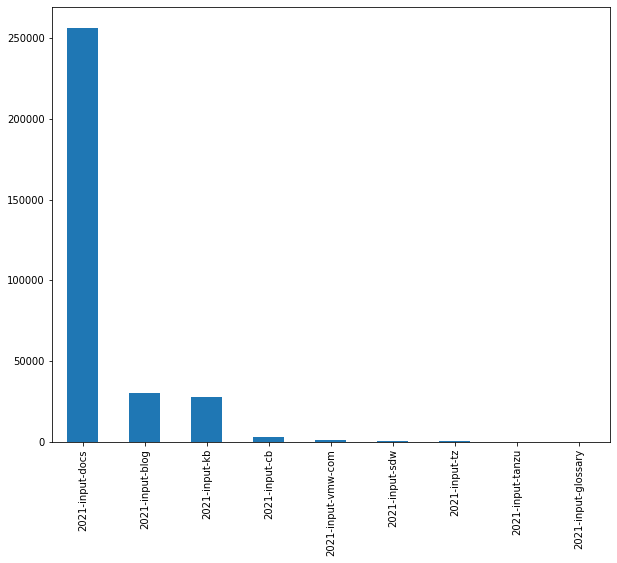

In [13]:
plt.figure(figsize=(10,8))
train_text__['Folder'].value_counts().plot.bar()
plt.show()

In [14]:
train_text__["Text"] = train_text__["Text"].apply(lambda x:x.lower())
train_text__.head()

,Text,FileName,Folder
0,homepage - vmware blogs\nvmware blogs\nfeature...,https---blogs.vmware.com-.txt,2021-input-blog
1,affiliate sources - vmware blogs\naffiliate so...,https---blogs.vmware.com-affiliate-sources.txt,2021-input-blog
2,24 hours of pass session slides uploaded - vmw...,https---blogs.vmware.com-affiliates-24-hours-o...,2021-input-blog
3,41 novos labs disponiveis no vmware hands-on l...,https---blogs.vmware.com-affiliates-41-novos-l...,2021-input-blog
4,#433 - hol w/dave rollins & vexpert pro w/vald...,https---blogs.vmware.com-affiliates-433-hol-w-...,2021-input-blog


In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter

import nltk
import os
import string
import numpy as np
import copy
import pandas as pd
import pickle
import re
import math

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\pchaudhari\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\pchaudhari\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\pchaudhari\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\pchaudhari\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\pchaudhari\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_

[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C:\Users\pchaudhari\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     C:\Users\pchaudhari\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     C:\Users\pchaudhari\AppData\Roaming\nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     C:\Users\pchaudhari\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     C:\Users\pchaudhari\AppData\Roaming\nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk

True

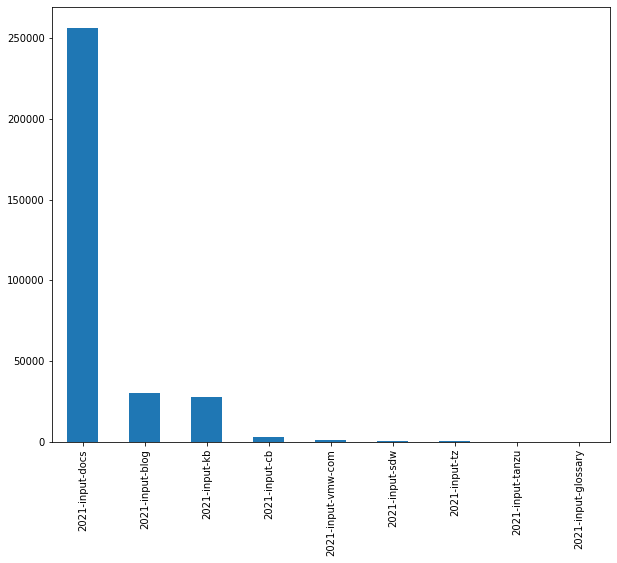

In [16]:
#Select only 10% data from whole dataset

Train_sample = train_text__.sample(frac = 1)

plt.figure(figsize=(10,8))
Train_sample['Folder'].value_counts().plot.bar()
plt.show()

# Preprocess your data

In [17]:
#Train_sample

In [18]:
%%time
def remove_newlinechars(text):
    '''
    Substitute any newline chars with a whitespach
    
    The `regex` can be tried at: https://regex101.com/r/2fImPz/1/
    '''
    regex = r'\s+'
    return re.sub(regex, ' ', text)
  
Train_sample['Text'] = Train_sample['Text'].apply(lambda x:remove_newlinechars(x))

Wall time: 1min 19s


In [19]:
%%time
def remove_punctuation(data):
    symbols = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = re.sub(r'[^\x00-\x7F]+',' ', str(data))
        data = re.sub(r'\\p{Sc}',' ', str(data))
        data = re.sub('(\(.*?\))|(\[.*?\])','',str(data))
        data = re.sub(r'( +)',' ', str(data))
        data = re.sub(r'#^(?:(?:[0-9]{2}[:\/,]){2}[0-9]{2,4}|am|pm)$',' ', str(data))  
        data = re.sub(" \d+", " ", data)
        data = re.sub(r'\S*@\S*\s?',' ',str(data))
        data = np.char.replace(data, "'", "")
        data = np.char.replace(data, '"', "")
        data = re.sub('(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})','link',str(data))
    return data

#Train_sample['Text'] = Train_sample['Text'].apply(lambda x:remove_punctuation(x))

Wall time: 0 ns


In [20]:
%%time
from nltk.corpus import stopwords

def remove_stop_words(data):
    stop_words = stopwords.words('english')
    stop_words.extend(["from","subject","summary","keywords","article",'facebook','twitter','rss','homepage', 'blogs','news', 'stream', 'cookie', 'settings',
                       'feedly.com','subscribe','articles','linkedin',"can't",'likely','cant','isnt',
                       'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
                       'sunday', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',
                        'sep', 'oct', 'nov', 'dec', 'january', 'february', 'march',
                        'april', 'may', 'june', 'july', 'august', 'september', 'october',
                        'november', 'december'])
    
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

#Train_sample['Text'] = Train_sample['Text'].apply(lambda x:remove_stop_words(x))

Wall time: 0 ns


In [21]:
def preprocess(df,dask_=False, P = True, S = True):
    start_time = time.time()
#     #series_text = corona_df['text_body']
#     series_abbr  = corona_df['abbr_dict']
    _series = df["Text"]
                          
    if P: 
        print('Cleaning text now!')
        if dask_:
            _series = (dd
                               .from_pandas(_series, npartitions=4)
                               .apply( lambda x: remove_punctuation(x),meta=('Text', 'object'))
                               .compute(scheduler='processes')
                                )
        else:
            _series = _series.apply(lambda x: remove_punctuation(x))   


    if S: 
        print('Removing stop words now!')
        if dask_:
            _series = (dd
                               .from_pandas(_series, npartitions=4)
                               .apply( lambda x: remove_stop_words(x),meta=('Text', 'object'))
                               .compute(scheduler='processes')
                                )
        else:
            _series = _series.apply(lambda x: remove_stop_words(x))               
                  
    print ("completed preprocessing text in {:2f} minutes".format((time.time()-start_time)/60))
    
    return _series

In [22]:
Train_sample["Text"] = preprocess(Train_sample,dask_= True)

Cleaning text now!
Removing stop words now!
completed preprocessing text in 73.102077 minutes


In [23]:
Train_sample.tail(10)

,Text,FileName,Folder
92336,log files help troubleshoot issues installati...,en-2021-VMware-Horizon-7-7-3-horizon-client-ag...,2021-input-docs
164201,device type switch specific model fsp150cc ge...,en-2021-VMware-Smart-Assurance-10-1-1-ncm-dsr-...,2021-input-docs
219237,using remote management software set esxi mig...,en-2021-VMware-vSphere-7-0-com-vmware-esxi-ins...,2021-input-docs
47834,migrate disk groups hybrid virtual san cluste...,en-2021-Virtual-SAN-6-5-com-vmware-vsphere-vir...,2021-input-docs
31305,rsa conference keynote pyramid protection ret...,https---www.carbonblack.com-blog-rsa-conferenc...,2021-input-cb
227728,install content rendering engine end users se...,en-2021-VMware-Workspace-ONE-UEM-1907-Content_...,2021-input-docs
63754,join federation multi instance management das...,en-2021-VMware-Cloud-Foundation-4-0-com-vmware...,2021-input-docs
34955,vrealize orchestrator workflows overview dash...,en-2021-Management-Packs-for-vRealize-Operatio...,2021-input-docs
184359,discover cisco aci fabric using domain manage...,en-2021-VMware-Telco-Cloud-Operations-1-1-0-co...,2021-input-docs
99198,group policy html access specified adm admx t...,en-2021-VMware-Horizon-7-7-7-horizon-client-ag...,2021-input-docs


In [24]:
Train_sample.to_csv("train_text_clean_.csv")

In [50]:
def stemming(data):
    import nltk
    from nltk.stem import PorterStemmer
    
    ps = PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + ps.stem(w)
    return new_text

In [51]:
stemming(Train_sample['Text'][21508])

' receiv rebat manag compet train partner share share share share email post manag compet race profit usd train rebat extend due high demand hand manag train partner unabl particip last quarter make sure regist today class fill quickli fund limit learn vmware partner network team relat uncategor new vop sd wan accredit avail partner univers vmware partner connect uncategor announc vsphere vsan vsan eog extens vmware partner connect uncategor vmlive next week regist daili dose vmware partner connect uncategor partner demand center incent new campaign vmware partner connect uncategor hybrid cloud multi cloud vmware tanzu vmware partner connect uncategor hybrid cloud multi cloud vmware tanzu vmware partner connect uncategor new nsx servic defin firewal accredit train vmware partner connect uncategor vmlive next week regist daili dose vmware partner connect uncategor carbon black solut updat new resourc vmware partner connect comment leav repli cancel repli must log post comment'

In [44]:
Train_sample.shape

(320685, 4)

In [52]:
%%time
Train_sample['Text'] = Train_sample['Text'].apply(lambda x:stemming(x))

In [53]:
Train_sample.to_csv("train_text_clean_stem.csv")

# Training Cosine Method

In [54]:
!pip install "tensorflow_hub>=0.6.0"
!pip install "tensorflow>=2.0.0"

You should consider upgrading via the 'c:\users\pchaudhari\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\pchaudhari\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [55]:
import tensorflow as tf
import tensorflow_hub as hub

## Load USE model
module_url = "https://tfhub.dev/google/nnlm-en-dim128/2"
embed = hub.KerasLayer(module_url)

In [56]:
Train_sample["Text_Para"]=Train_sample["Text"].progress_apply(lambda x:re.split('\n',x))

  0%|          | 0/320685 [00:00<?, ?it/s]

In [57]:
import nltk
sent= nltk.flatten(Train_sample["Text_Para"].to_list())

In [58]:
# create embeddings for sentences
embeddings = embed(sent)
embeddings.shape

TensorShape([320685, 128])

In [59]:
#Calculate cosine similarity of query with all sentences
def cosine_similarity_func(embeddings,embeddings_query):
    '''
    Input:
         embeddings: array or tensor of all sentence embeddings (nX128 for n sentences)
         embeddings_query: array or tensor of query embedding (1X128)
    Output:
         cosine_similarity: cosine similarity of query with each sentence (nX1) 
    '''
    # x.y
    dot_product = np.sum(np.multiply(np.array(embeddings),np.array(embeddings_query)),axis=1)
    
    #||x||.||y||
    prod_sqrt_magnitude = np.multiply(np.sum(np.array(embeddings)**2,axis=1)**0.5, np.sum(np.array(embeddings_query)**2,axis=1)**0.5)
    
    #x.y/(||x||.||y||)
    cosine_similarity  = dot_product/prod_sqrt_magnitude
    return cosine_similarity

In [60]:
# function for recommend text based upon query
def recommended_text(query,embeddings,sent,threshold_min=.95,threshold_max = 1):
    '''
    Input:
         query: list of queries
         embeddings: embeddings of all sentences
         sent:list all sentences
         threshold_min: lower limit of threshold for which sentence is supposed to be similar with query
         threshold_max: upper limit of threshold for which sentence is supposed to be similar with query
         
    Output:
          recommend_text: list of similar sentences with query
    '''
    recommend_text = []
    embeddings_query = embed(query) #create embedding for query
    
    cosine_similarity = cosine_similarity_func(embeddings,embeddings_query) # get cosine similarity with all sentences
    
    # standardize cosine similarity output, Range(0,1)
    standardize_cosine_simi  = (cosine_similarity-min(cosine_similarity))/(max(cosine_similarity)-min(cosine_similarity))
    
    #sort sent based upon cosine similarity score
    sent_prob = list(map(lambda x, y:(x,y), standardize_cosine_simi, sent)) 
    sent_prob.sort(key=lambda tup: tup[0], reverse=True)

    # select sentences by using upper and lower threshold
    for i,j in sent_prob:
        #if (i >threshold_min) and (i<=threshold_max):
            recommend_text.append(j)
    return recommend_text

In [61]:
q = 'an error occurred while sending a logout request to the vcenter single sign on server an error occurred when processing the metadata during vcenter single sign on setup null'

In [62]:
query = [q]
result = recommended_text(query,embeddings,sent,threshold_min=.95)
print(len(result))
result[0]

320685


' java lang runtimeexcept couldnt login client couldnt login client server return request expir less second java lang runtimeexcept java lang runtimeexcept couldnt login client couldnt login client server return request expir less second error configur endpoint skylin collector couldnt creat collect task test endpoint java lang runtimeexcept couldnt login client couldnt login client server return request expir less second vmware kb error configur endpoint skylin collector couldnt creat collect task test endpoint java lang runtimeexcept couldnt login client couldnt login client server return request expir less second symptom user receiv error configur endpoint skylin collector error creat collect task test endpoint java lang runtimeexcept login client login client server return request expir less second request issu expir least second caus error observ time differ endpoint skylin collector vmware product commun alway time resolut pleas ensur time zone correct skylin collector endpoint v

In [63]:
query = ["[400] an error occurred while sending a logout request to the vcenter single sign-on server - an error occurred when processing the metadata during vcenter single sign-on setup - null."]
result = recommended_text(query,embeddings,sent,threshold_min=.95)
print(len(result))
result[0]

320685


' upgrad vcenter server fail error error occur connect data sourc vmware kb upgrad vcenter server fail error error occur connect data sourc symptom upgrad vcenter server upgrad vcenter server fail see error error occur connect data sourc vminst log file see entri similar vmware virtualcent build error read vmware virtualcent build error occur connect data sourc vcdatabaseupgrad log file see entri similar info begin upgrad process info vmware vcenter detect sql server error errorlogin fail user sql user account initi fail exit vm launchdbupgradewizard report error error code recreat new dsn connect resolv issu restor vcenter server databas resolv issu reboot vcenter server resolv issu caus issu occur special non alphanumer charact exclam dollar hash percent equal sql user password use connect vcenter server databas resolut resolv issu connect sql server chang password sql user ensur special non alphanumer charact updat data sourc vcenter server new sql server password restart vcenter se

In [64]:
query = ["how to change vmware nsx"]
result = recommended_text(query,embeddings,sent,threshold_min=.95)
print(len(result))
result[0]

320685


' build number version vmware nsx vsphere vmware kb build number version vmware nsx vsphere purpos build number version vmware nsx vsphere resolut tabl list nsx vsphere build number version releas date version releas date build number vmware nsx data center vsphere vmware nsx data center vsphere vmware nsx data center vsphere vmware nsx data center vsphere vmware nsx data center vsphere vmware nsx data center vsphere vmware nsx data center vsphere vmware nsx data center vsphere vmware nsx data center vsphere vmware nsx data center vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere vmware nsx vsphere

In [65]:
query = ["400 an error occurred while sending a logout request to the vcenter single sign on server an error occurred when processing the metadata during vcenter single sign on setup null"]
result = recommended_text(query,embeddings,sent,threshold_min=.95)

In [73]:
query = ["hypervisor"]
result = recommended_text(query,embeddings,sent,threshold_min=.95)
print(len(result))
result[0]

320685


' support virtual hardwar network configur manag support virtual deploy vari per hypervisor due natur integr os hypervisor vmware best practic offer vmware hypervisor oper system vmware esx hypervisor sa deploy hypervisor vmware support perform interoper issu os layer hypervisor best practic deploy non vmware hypervisor check hypervisor vendor address issu reproduc physic vmware deploy environ'

# Submission

In [66]:
queries = pd.read_csv('vbetter-vqueries.csv',index_col=0)
queries.head()

,QUERY
ID,
0,what is hypervisor
1,what is a hypervisor
2,what is vmware
3,unable to login because you do not have permis...
4,what is virtualization


In [74]:
%%time
n=5
submission = pd.DataFrame(columns=['ID','RANK','RESULT'])
for index, row in queries.iterrows():
    query = [stemming(remove_stop_words(remove_punctuation(row['QUERY'])))]
    result = recommended_text(query,embeddings,sent,threshold_min=.95)
    for i in range(n):
        #print(result[i])
        df = pd.DataFrame({'ID': [index],"RANK":[i+1],'RESULT':[Train_sample[Train_sample['Text'] == result[i]]['FileName'].values[0]]})
        submission = submission.append(df, ignore_index=True)
    print(index)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


In [75]:
submission.to_csv("submission_8th_July_Cosine.csv",index=False)

In [76]:
submission.head(100)

,ID,RANK,RESULT
0,0,1,en-2021-VMware-Smart-Assurance-10-1-0-ncm-supp...
1,0,2,en-2021-VMware-Smart-Assurance-10-1-0-ncm-supp...
2,0,3,en-2021-VMware-Smart-Assurance-10-1-0-ncm-supp...
3,0,4,en-2021-VMware-Smart-Assurance-10-1-0-ncm-supp...
4,0,5,en-2021-VMware-Smart-Assurance-10-1-2-esm-user...
5,1,1,en-2021-VMware-Smart-Assurance-10-1-0-ncm-supp...
6,1,2,en-2021-VMware-Smart-Assurance-10-1-0-ncm-supp...
7,1,3,en-2021-VMware-Smart-Assurance-10-1-0-ncm-supp...
8,1,4,en-2021-VMware-Smart-Assurance-10-1-0-ncm-supp...
9,1,5,en-2021-VMware-Smart-Assurance-10-1-2-esm-user...


In [77]:
submission.shape

(11755, 3)